<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Longer_Term_Crypto_Degrees_of_Freedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

17:06:05 Starting...
17:06:05 Installing yfinance into Google notebook...
17:06:13 Installing arch into Google notebook...
17:06:27 Initialized.


In [2]:
try:
    from google.colab import drive
    nprint("Google Drive %s." % drive.mount("/content/drive"))

except:
    raise

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
17:06:28 Google Drive None.


In [3]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=data.columns.droplevel(1)
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
data.drop(data.index[-1],inplace=True) # remove the final row in case it is not complete
data.drop(data.index[data.index<(fd:='2024-07-31')],inplace=True) # remove data before 2024-07-31
data=data[data.columns[data.apply(lambda x:x.first_valid_index())<=fd]] # remove newly added tickers after 2024-07-31
display(data)

Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
UTC Date,,,,,,,,,,,,,,
2024-07-31,2.001567,-2.358840,-4.200110,-2.365537,-0.047707,-2.837462,-2.073961,-1.452662,-2.375695,-2.164731,-6.382353,-3.024153,-1.936113,-2.775783
2024-08-01,8.726297,0.036957,-0.288448,1.151609,1.518046,-2.302137,-0.996922,-0.871557,0.491381,-0.799247,-0.816839,0.230222,-1.248259,-0.608589
2024-08-02,-5.610969,-8.265604,-7.564218,-6.025579,-4.053610,-6.341034,-6.167053,-6.727354,-7.544241,-6.546150,-7.190371,-8.025336,-3.852546,-5.256278
2024-08-03,-4.481945,-3.931834,-4.592054,-1.198185,-13.779336,-3.094934,-2.771871,-2.837828,-1.918234,-0.578258,-2.866894,0.234600,-2.236539,-0.486530
2024-08-04,-7.831497,-6.321154,-8.886479,-4.229510,-7.939911,-4.046256,-3.804583,-7.507444,-6.932854,-3.440406,-6.289529,-7.255568,-5.467211,-3.531816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-29,-6.272523,-5.000130,-2.810090,-1.685678,-4.745754,-3.029930,-3.817375,-1.416388,-4.767550,-2.366509,-3.704540,-4.182955,-5.071828,-6.341016
2024-12-30,-3.054976,0.360369,1.195787,-0.956064,-1.876412,-0.163914,-0.423346,0.190245,-1.671194,1.130461,-0.938306,2.448412,-1.840672,1.058281
2024-12-31,-4.205182,-0.660918,-2.174115,0.825987,-3.400888,0.656219,-1.554116,-0.729713,-2.803256,3.805244,0.118399,-0.622499,0.041892,-4.871609


Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
Return (%),,,,,,,,,,,,,,
AAVE-USD,1.000000,0.622349,0.526433,0.454187,0.615693,0.328045,0.641369,0.656452,0.657989,0.407403,0.405661,0.686243,0.172413,0.381993
AVAX-USD,0.622349,1.000000,0.672091,0.678950,0.746734,0.611039,0.739798,0.704786,0.820535,0.614316,0.639840,0.636950,0.352172,0.518052
BCH-USD,0.526433,0.672091,1.000000,0.772439,0.549036,0.668222,0.792048,0.790690,0.607029,0.625254,0.654365,0.698653,0.368290,0.578687
BTC-USD,0.454187,0.678950,0.772439,1.000000,0.513582,0.765715,0.667129,0.803894,0.556451,0.549748,0.671717,0.609265,0.236603,0.454262
COMP-USD,0.615693,0.746734,0.549036,0.513582,1.000000,0.466376,0.729392,0.634406,0.672733,0.505692,0.574646,0.590202,0.321997,0.506043
DOGE-USD,0.328045,0.611039,0.668222,0.765715,0.466376,1.000000,0.574050,0.621800,0.443529,0.478185,0.784117,0.490432,0.304558,0.399309
ETC-USD,0.641369,0.739798,0.792048,0.667129,0.729392,0.574050,1.000000,0.822578,0.679826,0.685616,0.678895,0.774117,0.500474,0.592679
ETH-USD,0.656452,0.704786,0.790690,0.803894,0.634406,0.621800,0.822578,1.000000,0.652085,0.580023,0.634757,0.732907,0.263881,0.518499
LINK-USD,0.657989,0.820535,0.607029,0.556451,0.672733,0.443529,0.679826,0.652085,1.000000,0.605065,0.459826,0.665391,0.342215,0.532859


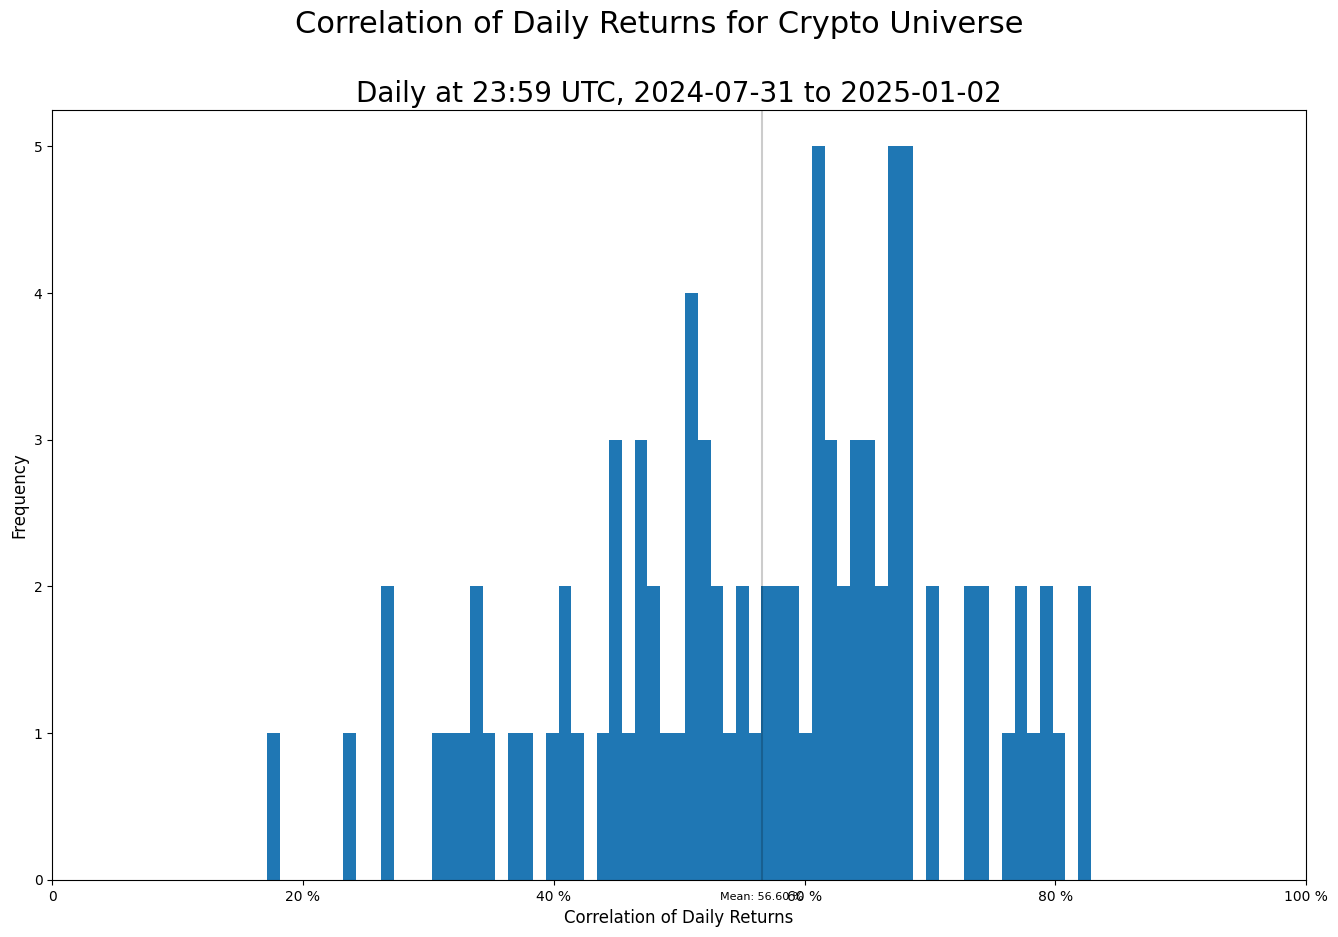

In [4]:
display(rho:=data.corr())
samples=pd.DataFrame({"row":[],"column":[],"correlation":[]}).set_index(["row","column"])

for i in range(rho.shape[0]):
    for j in range(i+1,rho.shape[0]):
        samples.loc[(rho.index[i],rho.columns[j]),"correlation"]=rho.iloc[i,j]*hundred

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
counts,bins,patches=plot.hist(samples['correlation'],bins=np.linspace(zero,hundred,100))
plot.set_xlabel("Correlation of Daily Returns",fontsize=12)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.set_ylabel("Frequency",fontsize=12)
plot.yaxis.set_major_formatter(CountLabels(0))
plot.set_title(subtitle:="Daily at 23:59 UTC, %s to %s" % (data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,hundred)
plot.axvline(m:=samples['correlation'].mean(),color='black',alpha=0.2)
plot.text(m,zero,"\nMean: {:.2f} %".format(m),ha='center',va='top',fontsize=8)
figure.suptitle(title:="Correlation of Daily Returns for Crypto Universe",fontsize=22)
figure.savefig((filepath:='/content/drive/MyDrive/')+title+(filetype:='.pdf'),dpi=300,bbox_inches='tight')

In [5]:
if 'random_seed' not in locals():
    random_seed=12345678 # don't reset the seed multiple times in one session

if random_seed is not None:
    generator=np.random.default_rng(seed=random_seed)
    nprint("Using NumPy random seed %d." % random_seed)
    random_seed=None

else:
    nprint("Continuing random sequence from prior seed.")

17:06:31 Using NumPy random seed 12345678.


In [6]:
results=pd.DataFrame({"Sample":range(1,(n:=1000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^503-1 choices
    returns=pd.DataFrame()

    for ticker in data[generator.choice(data.columns,generator.integers(1,data.shape[1]+1),replace=False)]:
        returns[ticker]=data[ticker]
        returns=returns.copy() # 'cos it frags, apparently

    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],returns.columns))) # list of coins in portfolio
    returns['Portfolio']=returns.mean(axis=1) # equal weighted portfolio return
    select=returns["Portfolio"]>zero if filter=="Up" else returns["Portfolio"]<zero if filter=="Down" else ~returns["Portfolio"].isna()
    results.loc[i,"Assets"]=returns.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=returns.loc[select,[a for a in returns if a!="Portfolio"]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=returns.loc[select,'Portfolio'].var() # variance of portfolio returns for same period as individual returns

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

17:06:31 Beginning analysis for 1,000 trials.


  0%|          | 0/1000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Independent,Effective D.o.F.
Sample,,,,,
1,14.0,15.107132,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,S...",1.995190,1.848972
2,9.0,15.051058,"AAVE,AVAX,BTC,ETH,LINK,LTC,SHIB,UNI,XLM",3.156213,1.887304
3,8.0,16.449518,"COMP,DOGE,ETH,LTC,SHIB,UNI,XLM,XTZ",3.969449,1.930488
4,7.0,15.780771,"BCH,ETH,LINK,LTC,SHIB,UNI,XTZ",3.690505,1.637026
5,10.0,15.191025,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETH,SHIB,UNI,XLM",2.840545,1.869884
...,...,...,...,...,...
996,7.0,19.504668,"AAVE,AVAX,COMP,DOGE,LINK,SHIB,XTZ",4.579756,1.643622
997,12.0,14.818030,"AAVE,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,SHIB,U...",2.111969,1.710324
998,8.0,14.783219,"BCH,BTC,ETC,LTC,SHIB,UNI,XLM,XTZ",3.454811,1.869585


17:06:58 Done.


In [7]:
from statsmodels.api import OLS,add_constant
Nmin,Nmax=five,results["Assets"].max()-one
design=results[select:=(results["Assets"]>=Nmin)&(results["Assets"]<=Nmax)][[yn:="Effective D.o.F.",xn:="Assets"]].drop_duplicates()
model=OLS(design[yn],add_constant(design[xn])).fit()
nprint(model.summary())
nprint("Implied regression factor count: {:.2f} +/- {:.2g} for data in [{:,.0f},{:,.0f}].".format(Kreg:=one/model.params.iloc[1],model.bse.iloc[1]/model.params.iloc[1]**4,Nmin,Nmax))
final=results[results[xn]==results[xn].max()].drop_duplicates(xn)
Nstar,Nact=tuple(final.iloc[-1][[yn,xn]])
rho=(Nact-Nstar)/((Nact-one)*Nstar)
nprint("Effective D.o.F. Limit {:,.2f}, Implied Correlation {:.2f} %.".format(Nstar,rho*hundred))
Khat=Nact/Nstar
nprint("Implied limiting factor count: {:.0f}.".format(Khat))

17:06:59                             OLS Regression Results                            
Dep. Variable:       Effective D.o.F.   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     70.44
Date:                Fri, 03 Jan 2025   Prob (F-statistic):           3.53e-16
Time:                        17:06:59   Log-Likelihood:                 312.00
No. Observations:                 592   AIC:                            -620.0
Df Residuals:                     590   BIC:                            -611.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5949      0.021     75.587

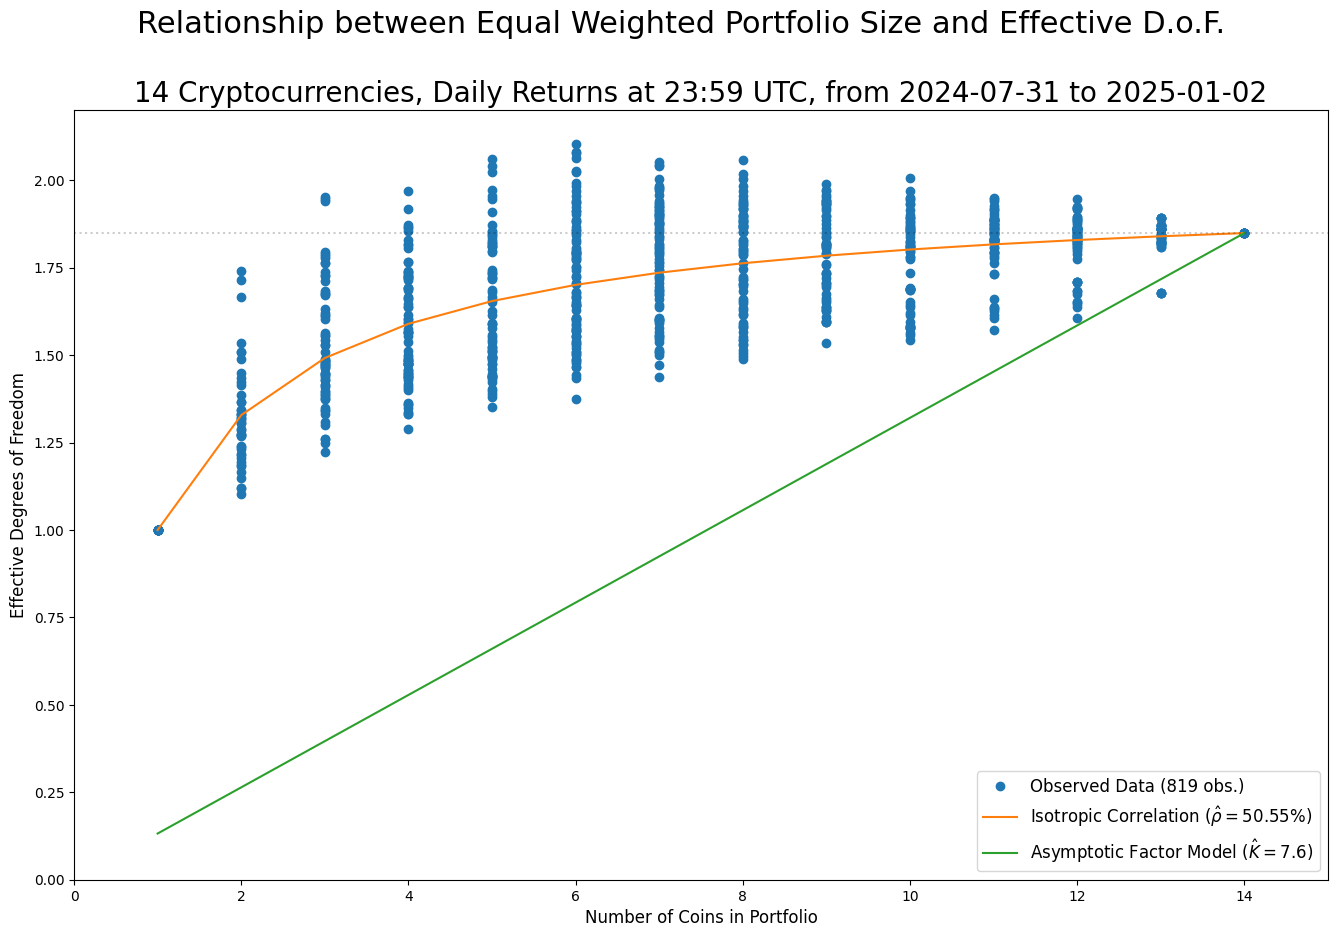

In [8]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=results["Assets"].to_numpy(),y:=results["Effective D.o.F."].to_numpy(),'o',label='Observed Data (%d obs.)' % results.shape[0])
plot.plot(xp:=np.unique(np.sort(x)),xp/(one+(xp-one)*rho),'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred))
plot.plot(xp,xp/Khat,'-',label="Asymptotic Factor Model ($\\hat{K} = %.1f$)" % Khat)
#plot.plot(xpp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xpp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg)
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F.",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (data.shape[1],data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')

17:07:00 Isotropic Model: Total Chi Squared 12.4548 for 12 d.o.f., p Value = 0.409881.
17:07:00 Factor Model: Total Chi Squared 20.4579 for 7 d.o.f., p Value = 0.00466107.


Mean   St.Dev. Sample  Std.Err. Isotropic                      \
                                                Model     Error   Z Score   
Assets                                                                      
1.0     1.000000  0.000000     14  0.000000  1.000000  0.000000       NaN   
2.0     1.328769  0.148843     44  0.022439  1.328444  0.000325  0.014504   
3.0     1.525614  0.174747     67  0.021349  1.491764  0.033850  1.585575   
4.0     1.582233  0.162954     80  0.018219  1.589469 -0.007237 -0.397213   
5.0     1.645135  0.186668     72  0.021999  1.654487 -0.009352 -0.425111   
6.0     1.717187  0.179918     89  0.019071  1.700870  0.016317  0.855583   
7.0     1.771688  0.157400     81  0.017489  1.735626  0.036062  2.061975   
8.0     1.772007  0.152790     70  0.018262  1.762640  0.009367  0.512942   
9.0     1.785145  0.125440     59  0.016331  1.784238  0.000906  0.055496   
10.0    1.775564  0.127047     62  0.016135  1.801902 -0.026338 -1.632363   
11.0    1.822844  0.090193     63  0.011363  1.816617  0.006227  0.547955   
12.0    1.820031  0.079351     65  0.009842  1.829064 -0.009033 -0.917781   
13.0    1.833394  0.056285     43  0.008583  1.839730 -0.006336 -0.738158   

                    Factor                                
         Chi Sq.     Model     Error   Z Score   Chi Sq.  
Assets                                                    
1.0          NaN       NaN       NaN       NaN       NaN  
2.0     0.000210       NaN       NaN       NaN       NaN  
3.0     2.514049       NaN       NaN       NaN       NaN  
4.0     0.157778       NaN       NaN       NaN       NaN  
5.0     0.180719  1.694423 -0.049288 -2.240442  5.019582  
6.0     0.732022  1.714321  0.002867  0.150315  0.022594  
7.0     4.251740  1.734219  0.037469  2.142447  4.590077  
8.0     0.263109  1.754117  0.017890  0.979639  0.959692  
9.0     0.003080  1.774015  0.011130  0.681529  0.464482  
10.0    2.664609  1.793913 -0.018348 -1.137182  1.293183  
11.0    0.300255  1.813811  0.009033  0.794925  0.631906  
12.0    0.842321  1.833709 -0.013678 -1.389680  1.931210  
13.0    0.544877  1.853607 -0.020212 -2.354819  5.545174

17:07:00 F Test for Equivalence of Descriptions: F(7,12) = 2.81584, p Value = 0.110868.


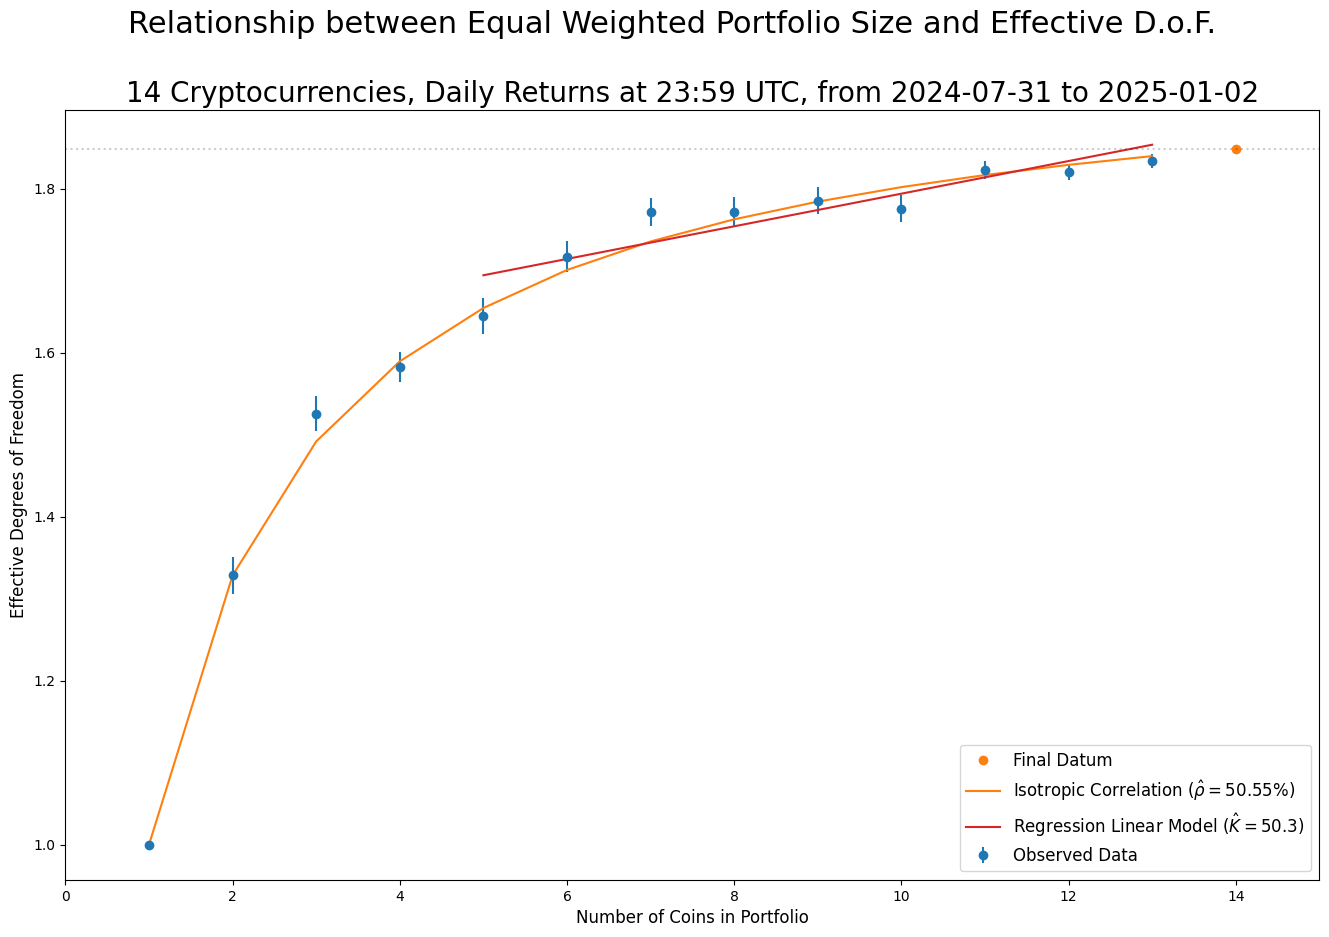

In [9]:
from scipy.stats import chi2,f as fdensity
meta=pd.DataFrame()
meta["Mean"]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta["St.Dev."]=g.std()
meta["Sample"]=g.count()
meta["Std.Err."]=meta["St.Dev."]/meta["Sample"]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))
meta[(l:="Factor","Model")]=list(map(lambda x:model.params.iloc[0]+model.params.iloc[1]*x if x>=Nmin and x<=Nmax else np.nan,meta.index))
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count()-len(model.params),chi2(df2).sf(sc22)))
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
display(meta)

nprint("F Test for Equivalence of Descriptions: F(%d,%d) = %g, p Value = %g." % (df2,df1,(f:=(sc22/df2)/(sc21/df1)),two*min([fdensity(df2,df1).sf(f),fdensity(df2,df1).cdf(f)])))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta["Mean"],yerr=meta["Std.Err."],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg,color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+" 2"+filetype,dpi=300,bbox_inches='tight')

17:07:01 Isotropic Model: Total Chi Squared 12.4548 for 12 d.o.f., p Value = 0.409881.
17:07:01 Fitted linear factor model curve via NLLS: b2bar = 3.47848e-14 ± 0.195798, bbar2 = 7.6672 ± 1.29552e+07, s2bar = 17.5184 ± 2.96006e+07. K* = 4.53683e-15
17:07:01 Factor Model: Total Chi Squared 666.829 for 9 d.o.f., p Value = 9.31583e-138.


Sample                           Isotropic                      \
            Mean   St.Dev. Count  Std.Err.     Model     Error   Z Score   
Assets                                                                     
1.0     1.000000  0.000000    14  0.000000  1.000000  0.000000       NaN   
2.0     1.328769  0.148843    44  0.022439  1.328444  0.000325  0.014504   
3.0     1.525614  0.174747    67  0.021349  1.491764  0.033850  1.585575   
4.0     1.582233  0.162954    80  0.018219  1.589469 -0.007237 -0.397213   
5.0     1.645135  0.186668    72  0.021999  1.654487 -0.009352 -0.425111   
6.0     1.717187  0.179918    89  0.019071  1.700870  0.016317  0.855583   
7.0     1.771688  0.157400    81  0.017489  1.735626  0.036062  2.061975   
8.0     1.772007  0.152790    70  0.018262  1.762640  0.009367  0.512942   
9.0     1.785145  0.125440    59  0.016331  1.784238  0.000906  0.055496   
10.0    1.775564  0.127047    62  0.016135  1.801902 -0.026338 -1.632363   
11.0    1.822844  0.090193    63  0.011363  1.816617  0.006227  0.547955   
12.0    1.820031  0.079351    65  0.009842  1.829064 -0.009033 -0.917781   
13.0    1.833394  0.056285    43  0.008583  1.839730 -0.006336 -0.738158   

                    Factor                                   
         Chi Sq.     Model     Error    Z Score     Chi Sq.  
Assets                                                       
1.0          NaN  0.695572  0.304428        NaN         NaN  
2.0     0.000210  1.066477  0.262292  11.689125  136.635639  
3.0     2.514049  1.297017  0.228597  10.707718  114.655231  
4.0     0.157778  1.454193  0.128039   7.027854   49.390737  
5.0     0.180719  1.568218  0.076917   3.496380   12.224672  
6.0     0.732022  1.654717  0.062471   3.275658   10.729937  
7.0     4.251740  1.722583  0.049105   2.807774    7.883596  
8.0     0.263109  1.777252 -0.005245  -0.287216    0.082493  
9.0     0.003080  1.822232 -0.037087  -2.270982    5.157360  
10.0    2.664609  1.859889 -0.084325  -5.226222   27.313400  
11.0    0.300255  1.891877 -0.069034  -6.075157   36.907532  
12.0    0.842321  1.919387 -0.099356 -10.094789  101.904757  
13.0    0.544877  1.943297 -0.109902 -12.804061  163.943979

17:07:01 Wrote meta data to '/content/drive/MyDrive/meta.tex.'
17:07:01 F Test for Equivalence of Descriptions: F(9,12) = 71.3868, p Value = 9.72808e-09.


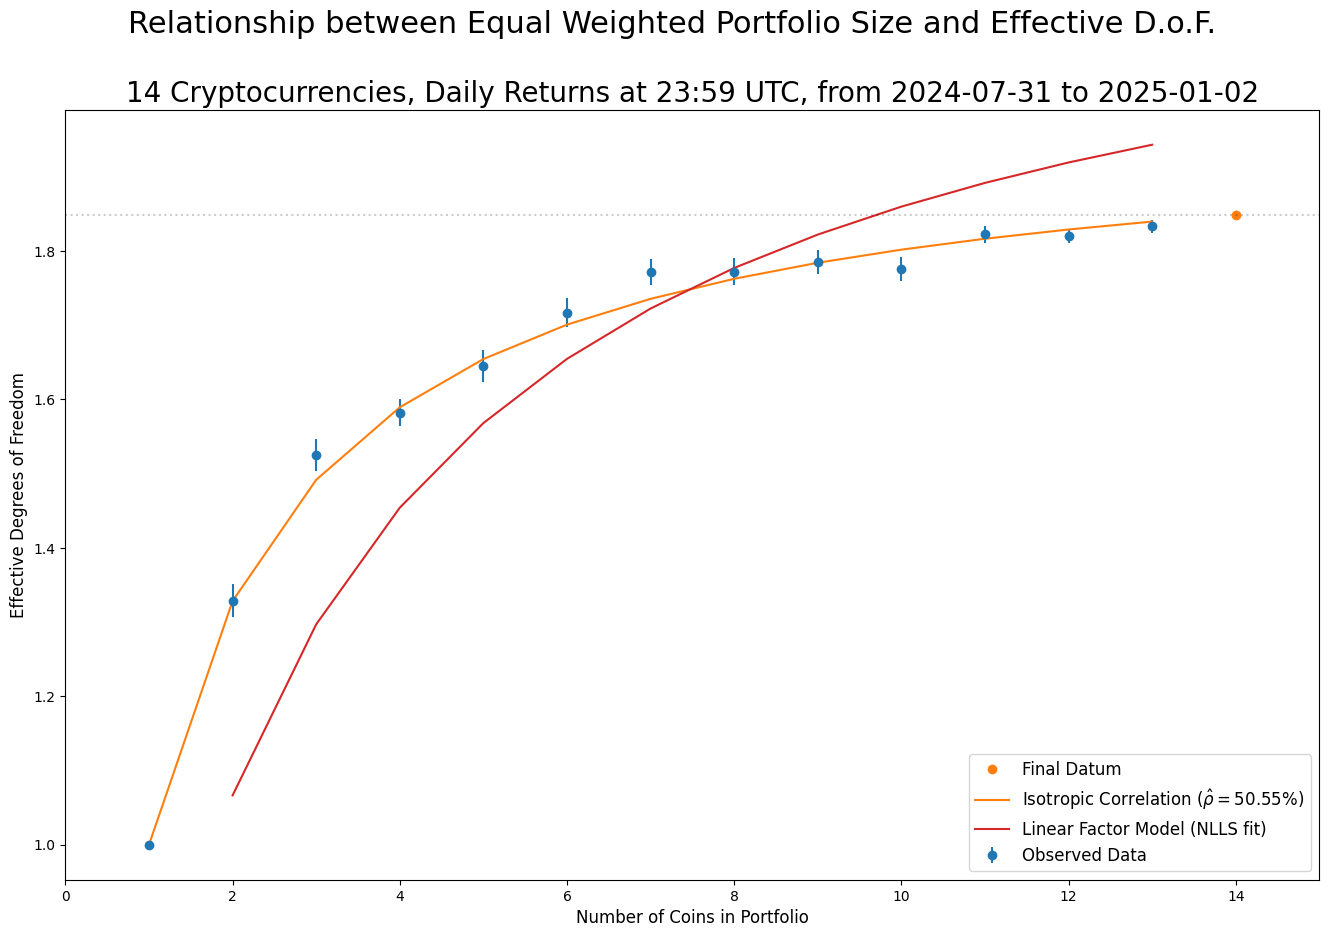

In [10]:
from scipy.stats import chi2,f as fdensity
from scipy.optimize import curve_fit

def nstar(N,*args):
    """Factor model N*(N) function. Parameters are: b2bar, bbar2, s2bar in that order."""
    b2bar,bbar2,s2bar=args
    return N*(b2bar*N+s2bar)/(bbar2*N+s2bar)

meta=pd.DataFrame()
meta[(s:="Sample","Mean")]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta[(s,"St.Dev.")]=g.std()
meta[(s,"Count")]=g.count()
meta[(s,"Std.Err.")]=meta[(s,"St.Dev.")]/meta[(s,"Count")]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta[(s,"Mean")]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta[(s,"Std.Err.")]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))

theta,vee=curve_fit(nstar,xf:=meta.index[1:],meta.loc[xf,(s,"Mean")],p0=(one,one,one/hundred),bounds=(zero,np.inf))
sigmas=np.sqrt(np.diag(vee))
nprint("Fitted linear factor model curve via NLLS: b2bar = %g ± %g, bbar2 = %g ± %g, s2bar = %g ± %g. K* = %g" % (theta[0],sigmas[0],theta[1],sigmas[1],theta[2],sigmas[2],theta[0]/theta[1]))
meta[(l:="Factor","Model")]=list(map(lambda q:nstar(q,*theta),meta.index))
meta[(l,"Error")]=meta[(s,"Mean")]-meta[(l,"Model")]
meta[(l,"Z Score")]=(meta[(l,"Error")]/meta[(s,"Std.Err.")]).replace(np.inf,np.nan)
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count()-len(theta),chi2(df2).sf(sc22)))

display(meta)
meta.replace(np.nan,"").style.format(precision=3).to_latex(latexfile:=filepath+'meta.tex')
nprint("Wrote meta data to '%s.'" % latexfile)

nprint("F Test for Equivalence of Descriptions: F(%d,%d) = %g, p Value = %g." % (df2,df1,(f:=(sc22/df2)/(sc21/df1)),two*min([fdensity(df2,df1).sf(f),fdensity(df2,df1).cdf(f)])))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta[(s,"Mean")],yerr=meta[(s,"Std.Err.")],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xf,zf:=list(map(lambda q:nstar(q,*theta),xf)),'-',label="Linear Factor Model (NLLS fit)",color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+" 3"+filetype,dpi=300,bbox_inches='tight')

In [15]:
from datetime import timedelta
history,returns=download(list(data)).xs('Adj Close',axis=1,level=0),pd.DataFrame()

for c in history:
    if history[c].last_valid_index()!=history.last_valid_index(): # get rid of tickers that have gone stale (this is COIN as returned by Yahoo)
        history.drop(columns=c,inplace=True)

    else:
        returns[c]=history[c].pct_change(fill_method=None)*hundred
        returns.loc[(f:=returns[c].first_valid_index()):(f+timedelta(days=365)),c]=np.nan # set first year of data to NA to avoid launch spikes

returns.index=pd.DatetimeIndex(returns.index).to_period('D')
returns.dropna(inplace=True,how='all')
returns.drop(returns.index[-1],inplace=True) # remove the final row in case it is not complete
returns=returns[[c for c in returns if c not in (vetoes:=['SHIB-USD','PEPE-USD','UNI-USD'])]].copy() # dropping SHIB,PEPE (very low values, precision issue) and UNI (step change in 2022 by orders of magnitude)
nprint("Removed %s entirely!" % ", ".join(vetoes))
returns=returns.copy()
returns['Count']=returns.count(axis=1)
returns=returns[returns['Count']>=five]
returns["Portfolio"]=returns.mean(axis=1)
returns["Year"]=returns.index.year
display(returns)

[*********************100%***********************]  14 of 14 completed

17:09:15 Removed SHIB-USD, PEPE-USD, UNI-USD entirely!


,AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,XLM-USD,XTZ-USD,Count,Portfolio,Year
Date,,,,,,,,,,,,,,
2018-11-11,NaN,NaN,-4.161377,0.031982,-3.744292,-2.096713,-0.561329,-2.208038,-1.978748,4.737204,0.642718,9,-0.033859,2018
2018-11-12,NaN,NaN,-3.193828,-0.623901,-3.099306,-0.742514,-0.436262,10.431562,-1.395306,-2.294911,-3.804309,9,0.384122,2018
2018-11-13,NaN,NaN,-0.754790,-0.184889,-3.883811,-1.225531,-1.707076,3.312554,-1.878841,-3.568305,-1.776871,9,-0.266756,2018
2018-11-14,NaN,NaN,-14.266303,-9.767137,-8.488966,-12.485053,-12.294876,-5.778568,-12.245908,-9.598618,-10.177453,9,-8.610288,2018
2018-11-15,NaN,NaN,-4.094623,-1.573977,3.896099,-2.833865,-0.325807,-1.133531,0.773886,3.819467,-0.530559,9,0.699709,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-29,-6.091733,-4.872789,-2.778618,-1.716725,-2.963395,-3.795341,-1.424082,-4.676738,-2.296198,-4.995705,-6.287106,11,-2.574869,2024
2024-12-30,-3.109099,0.221599,1.103066,-0.948373,-0.256428,-0.453802,0.205378,-1.696910,1.052316,-1.823924,1.023236,11,0.526422,2024
2024-12-31,-4.053448,-0.599136,-2.148327,0.848408,0.691202,-1.565643,-0.710907,-2.828034,3.785442,-0.022909,-5.022105,11,-0.052121,2024


In [16]:
results=pd.DataFrame({"Sample":range(1,(n:=5000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n,"Period":[np.nan]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^Nmax-1 choices
    period=generator.choice(returns[p:="Year"].unique(),1)[0]
    subset=returns[returns[p]==period][generator.choice(a:=[c for c in returns.columns if '-' in c],generator.integers(1,len(a)+1),replace=False)].copy()
    subset.dropna(inplace=True)
    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],subset.columns))) # list of coins in portfolio
    subset['Portfolio']=subset.mean(axis=1) # equal weighted portfolio return
    results.loc[i,"Assets"]=subset.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=subset[[c for c in subset if '-' in c]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=subset['Portfolio'].var() # variance of portfolio returns for same period as individual returns
    results.loc[i,"Period"]=period

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

17:10:53 Beginning analysis for 5,000 trials.


  0%|          | 0/5000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Period,Independent,Effective D.o.F.
Sample,,,,,,
3,2.0,26.281310,"AAVE,XTZ",2021.0,17.720734,1.348543
4,4.0,42.477950,"ETC,ETH,LINK,LTC",2018.0,13.034480,1.227411
5,11.0,12.695111,"AAVE,AVAX,BCH,BTC,DOGE,ETC,ETH,LINK,LTC,XLM,XTZ",2024.0,1.985879,1.720715
6,10.0,7.310917,"AAVE,AVAX,BCH,BTC,DOGE,ETC,ETH,LINK,LTC,XLM",2023.0,1.302401,1.781446
7,3.0,10.654840,"AAVE,AVAX,BCH",2023.0,5.769171,1.624380
...,...,...,...,...,...,...
4990,3.0,23.041388,"DOGE,ETC,LINK",2020.0,11.168040,1.454084
4994,3.0,19.192989,"BCH,LINK,XTZ",2019.0,12.255794,1.915667
4996,6.0,20.502141,"AAVE,DOGE,ETC,ETH,XLM,XTZ",2022.0,4.675912,1.368417


17:11:29 Done.


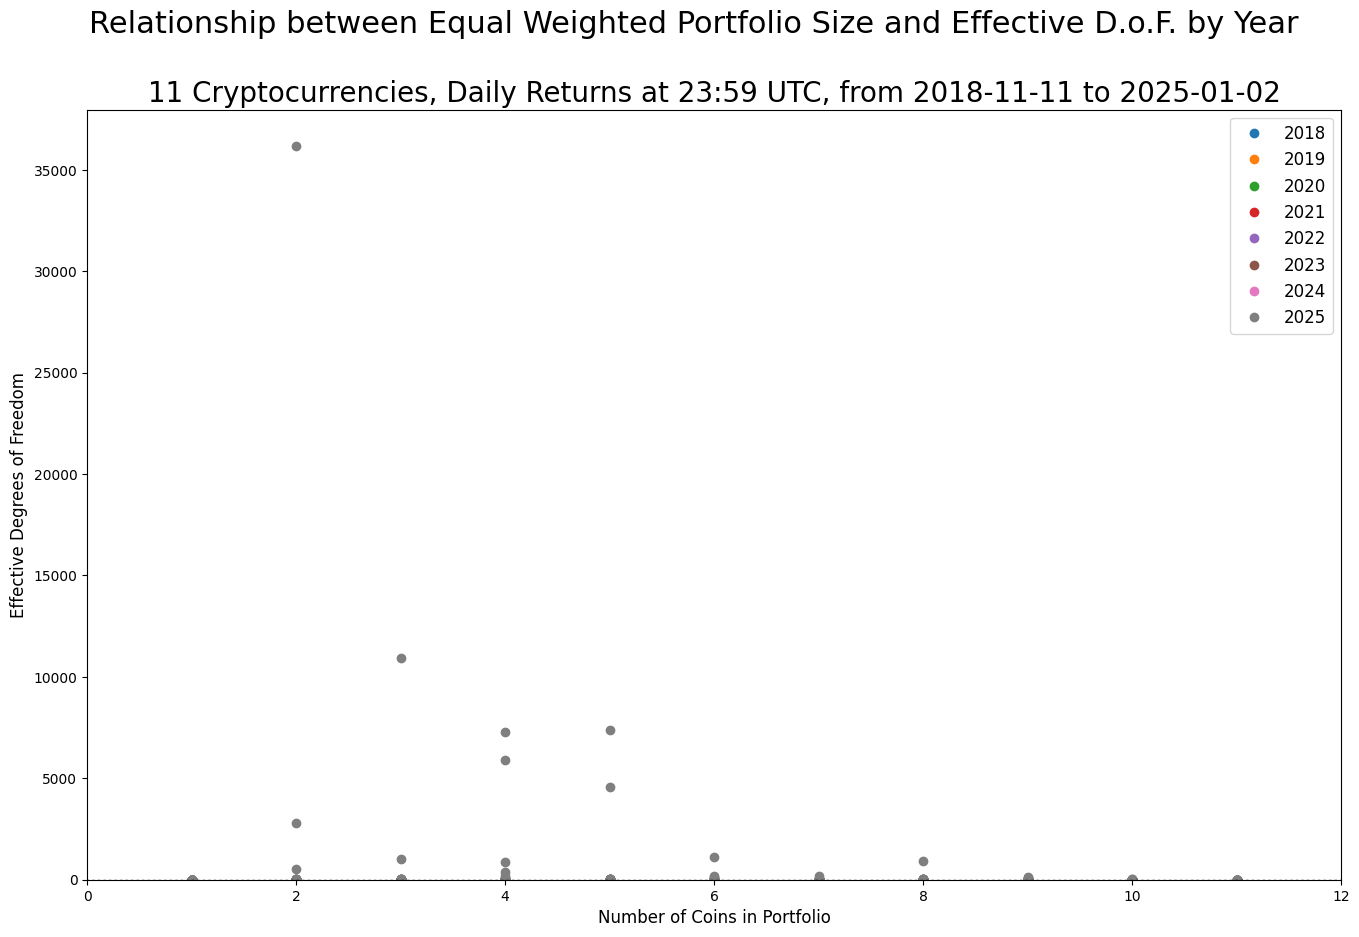

In [17]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
Nmax=results["Assets"].max()-one

for period in sorted(results["Period"].unique()):
    plot.plot(x:=results[select:=results["Period"]==period]["Assets"].to_numpy(),y:=results[select]["Effective D.o.F."].to_numpy(),'o',label=int(period))

plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F. by Year",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (len(a),returns.index[0],returns.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')

,AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,XLM-USD,XTZ-USD,Portfolio,Assets,Independent,Effective D.o.F.,Imputed Correlation
Year,,,,,,,,,,,,,,,,
2018,NaN,NaN,138.100860,25.599532,22.740650,50.768403,48.368609,69.624589,39.790087,41.815496,50.243165,30.908678,9,6.012980,1.750862,51.754075
2019,NaN,NaN,28.684996,12.690500,11.798156,19.125543,16.915673,48.141735,23.726669,18.438624,33.475413,10.387239,9,2.629596,2.278408,36.876586
2020,NaN,NaN,29.951167,14.219099,28.864247,27.412591,24.391541,44.235523,26.028220,37.074306,35.577777,16.649036,9,3.305611,1.786920,50.457486
2021,26.338886,64.152351,48.766624,17.715785,486.126192,65.957318,31.357507,53.562107,37.260494,54.787837,60.438949,31.808283,11,7.822017,2.705025,30.665066
2022,40.176555,32.575116,19.110765,11.061469,31.665288,36.796413,20.448674,26.495531,20.252314,16.127458,23.118447,15.636538,11,2.296099,1.615261,58.100438
2023,14.929209,19.360389,17.632938,5.247752,10.643087,11.242495,5.976481,14.988606,11.610572,18.608535,11.133410,6.137769,11,1.168376,2.093942,42.532485
2024,27.377064,24.396001,27.763433,7.856515,29.002709,18.385281,11.606438,22.636858,15.641404,29.878391,25.747313,10.667420,11,1.985879,2.047794,43.716352
2025,0.343391,1.180352,0.414162,1.205447,1.408605,0.943318,2.621284,22.311926,1.017716,328.196707,17.676542,4.108005,11,3.118343,8.349982,3.173681


17:12:10 Wrote variances to '/content/drive/MyDrive/variances.tex.'


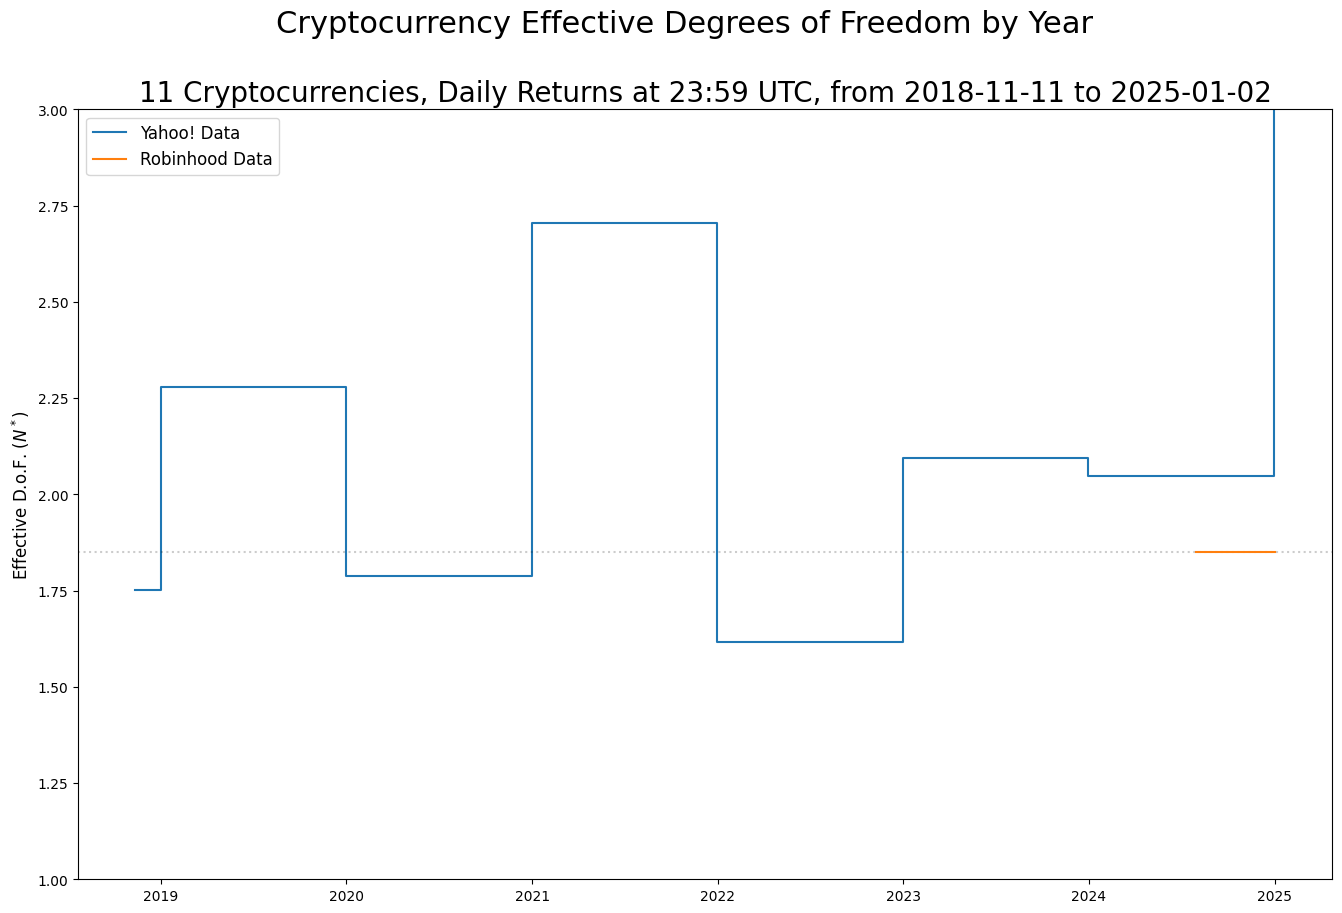

In [19]:
variances=returns[[c for c in returns if '-' in c or c in ('Portfolio','Year')]].groupby('Year').var()
variances["Assets"]=variances.count(axis=1)-1
variances["Independent"]=variances[[c for c in variances if '-' in c]].sum(axis=1)/variances["Assets"]**2
variances[ns:="Effective D.o.F."]=variances["Independent"]/variances["Portfolio"]*variances[na:="Assets"]
variances[nr:="Imputed Correlation"]=(variances[na]-variances[ns])/((variances[na]-one)*variances[ns])*hundred
display(variances)
variances.replace(np.nan,"").T.style.format(precision=2).to_latex(latexfile:=filepath+'variances.tex')
nprint("Wrote variances to '%s.'" % latexfile)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.step(x:=list(map(lambda x:pd.to_datetime(str(x)),[returns.index[0]]+list(map(lambda x:pd.Period(datetime(x,12,31),'D') if x<data.index[-1].year else data.index[-1],variances.index)))),
          y:=np.insert(variances[ns].to_numpy(),0,variances[ns].iloc[0]),'-',where='pre',label='Yahoo! Data') # the code to make x here is heinous, and that is due to Pandas
plot.set_ylabel("Effective D.o.F. ($N^*$)",fontsize=12)
plot.set_ylim(one,three)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.plot(x:=data.index[[0,-1]],y:=[Nstar]*len(x),'-',color='C1',label='Robinhood Data')
plot.legend(fontsize=12)
figure.suptitle(title:="Cryptocurrency Effective Degrees of Freedom by Year",fontsize=22)
plot.set_title(subtitle,fontsize=20)
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')